In [1]:
import pandas as pd

# Load the COVID-19 dataset
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20Kingdom.csv"
df = pd.read_csv(url)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Forward-fill NaN values in date-related columns
df = df.ffill()

# Handle missing values
df = df.dropna()
columns_to_drop = ['source_url', 'location']
df_new = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned dataset
df_new.head()


,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
263,2021-09-30,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",94633524.0,48863490,44901832,868202.0
264,2021-10-01,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",94859905.0,48901670,44936121,1022114.0
265,2021-10-02,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",95119823.0,48932736,44970512,1216575.0
266,2021-10-03,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",95254996.0,48956859,44992044,1306093.0
267,2021-10-04,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",95445881.0,48994530,45021381,1429970.0


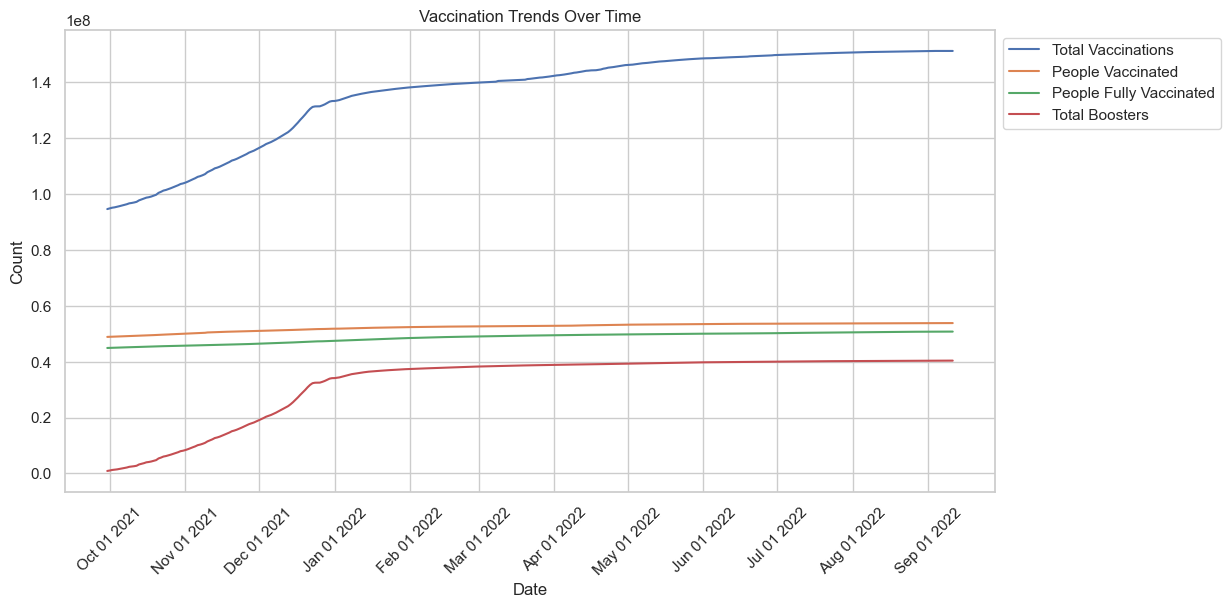

In [4]:
# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a new DataFrame with the required columns
columns_to_plot = ['date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']
df_plot = df_new[columns_to_plot]

# Melt the DataFrame to long format for easier plotting
df_plot = pd.melt(df_plot, id_vars='date', var_name='Vaccination Type', value_name='Count')

# Change the names within the legend
df_plot['Vaccination Type'] = df_plot['Vaccination Type'].map({
    'total_vaccinations': 'Total Vaccinations',
    'people_vaccinated': 'People Vaccinated',
    'people_fully_vaccinated': 'People Fully Vaccinated',
    'total_boosters': 'Total Boosters'})

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(x='date', y='Count', hue='Vaccination Type', data=df_plot)

# Customize the plot
lineplot.set_title('Vaccination Trends Over Time')
lineplot.set_xlabel('Date')
lineplot.set_ylabel('Count')

# Display the legend outside the plot
lineplot.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Format the x-axis dates
lineplot.xaxis.set_major_locator(mdates.MonthLocator())
lineplot.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
